In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
import seaborn as sb

In [68]:
import import_ipynb
import data

In [69]:
train = data.train
test = data.test

In [70]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Assuming the first three columns of your dataset are categorical
train.iloc[:, 0] = label_encoder.fit_transform(train.iloc[:, 0])
train.iloc[:, 1] = label_encoder.fit_transform(train.iloc[:, 1])
train.iloc[:, 2] = label_encoder.fit_transform(train.iloc[:, 2])

test.iloc[:, 0] = label_encoder.fit_transform(test.iloc[:, 0])
test.iloc[:, 1] = label_encoder.fit_transform(test.iloc[:, 1])
test.iloc[:, 2] = label_encoder.fit_transform(test.iloc[:, 2])


In [71]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Select numerical columns (assuming the last two columns are numerical for example purposes)
numerical_cols = train.columns[-2:]  # Adjust the index according to your dataset
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])


In [72]:
import numpy as np

# Reshape input to be [samples, time steps, features]
X_train = train.iloc[:, :-1].values
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

X_test = test.iloc[:, :-1].values
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Prepare the target variables
y_train = train.iloc[:, -1].values
y_test = test.iloc[:, -1].values


In [73]:
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [74]:
from tensorflow.keras.layers import LSTM, Dense

In [75]:
# Initialize the RNN
model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, X_train.shape[2])),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [76]:
model.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
21720/21720 [==============================] - 36s 2ms/step - loss: 0.3038
Epoch 2/25
21720/21720 [==============================] - 33s 2ms/step - loss: 0.0011
Epoch 3/25
21720/21720 [==============================] - 36s 2ms/step - loss: 8.8766e-04
Epoch 4/25
21720/21720 [==============================] - 34s 2ms/step - loss: 7.3900e-04
Epoch 5/25
21720/21720 [==============================] - 36s 2ms/step - loss: 7.0044e-04
Epoch 6/25
21720/21720 [==============================] - 41s 2ms/step - loss: 5.9766e-04
Epoch 7/25
21720/21720 [==============================] - 59s 3ms/step - loss: 5.3613e-04
Epoch 8/25
21720/21720 [==============================] - 32s 1ms/step - loss: 5.5935e-04
Epoch 9/25
21720/21720 [==============================] - 31s 1ms/step - loss: 4.9878e-04
Epoch 10/25
21720/21720 [==============================] - 32s 1ms/step - loss: 4.1940e-04
Epoch 11/25
21720/21720 [==============================] - 33s 2ms/step - loss: 3.6893e-04
Epoch 12/25
2172

In [77]:
loss = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")

predictions = model.predict(X_test)
# Display some predictions
print("Predictions:", predictions.flatten()[:5])
print("Actual values:", y_test[:5])

10698/10698 [==============================] - 10s 843us/step - loss: 3.6585e-05
Test loss: 3.6584729969035834e-05
10698/10698 [==============================] - 9s 816us/step
Predictions: [0.20147142 0.20147142 0.20147142 0.20147142 0.20147142]
Actual values: [0.20104021 0.20144029 0.19993999 0.20004001 0.20024005]


10698/10698 [==============================] - 9s 805us/step


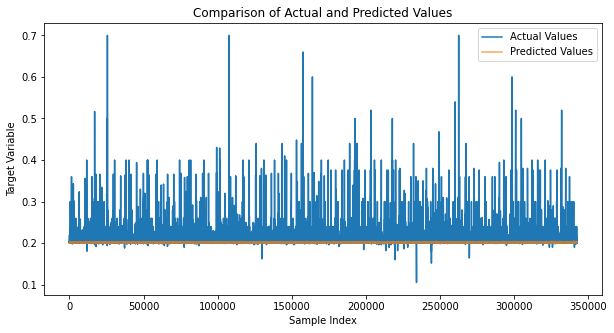

In [79]:
import matplotlib.pyplot as plt

# Assume predictions variable is already set with model.predict(X_test)
predictions = model.predict(X_test).flatten()

# Actual values
actual = y_test

# Creating the plot
plt.figure(figsize=(10, 5))
plt.plot(actual, label='Actual Values')
plt.plot(predictions, label='Predicted Values', alpha=0.7)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Variable')
plt.legend()
plt.show()


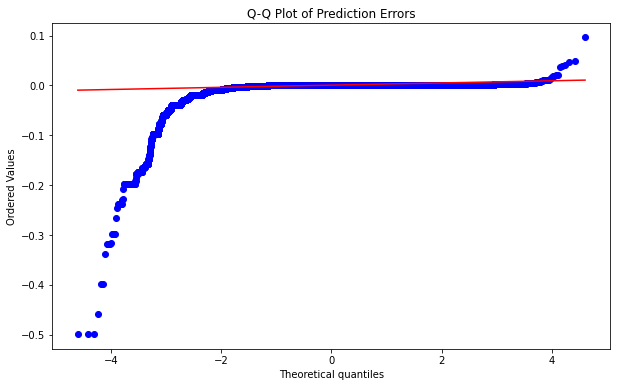

In [80]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(predictions - actual, dist="norm", plot=plt)
plt.title('Q-Q Plot of Prediction Errors')
plt.show()


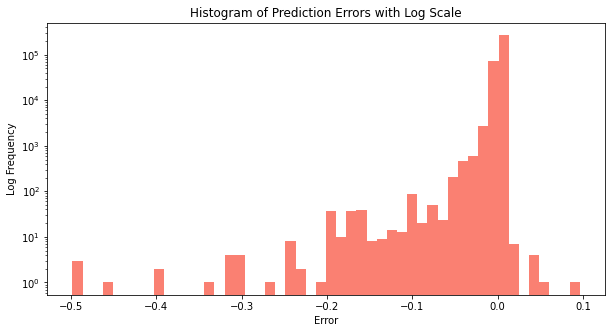

In [81]:
# Calculate errors
errors = predictions - actual

plt.figure(figsize=(10, 5))
plt.hist(errors, bins=50, color='salmon', log=True)
plt.title('Histogram of Prediction Errors with Log Scale')
plt.xlabel('Error')
plt.ylabel('Log Frequency')
plt.show()


In [83]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(actual, predictions)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 3.6584710131683635e-05
